# Keras TF 2.x - Code du Projet de Classification

Explorons une tâche de classification avec l'API de Keras TF 2.x

## Data

### Ensemble de données sur le cancer du sein au Wisconsin (diagnostic)
--------------------------------------------

**Caractéristiques du Dataset :**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

Ceci est une copie des données de l'UCI ML Breast Cancer Wisconsin (Diagnostic).
https://goo.gl/U2Uwz2

Les features sont calculées à partir d'une image numérisée d'une aiguille fine
aspirer (FNA) d'une masse mammaire.  Ils décrivent les caractéristiques des noyaux de cellules présents sur l'image.


---


Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv('cancer_classification.csv')

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/wamanagba/Data/main/cancer_classification.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

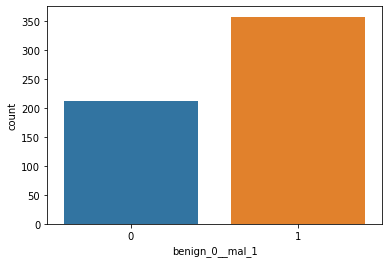

In [6]:
sns.countplot(x='benign_0__mal_1',data=df);

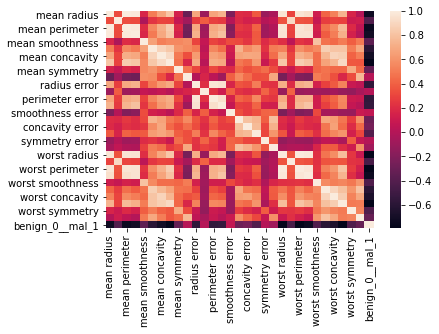

In [7]:
sns.heatmap(df.corr());

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

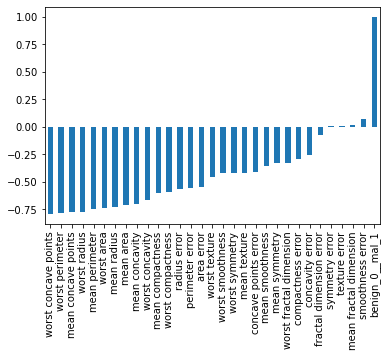

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar');

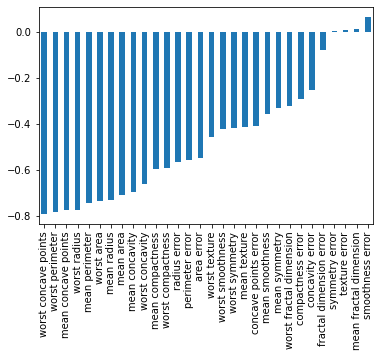

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

## Répartition Entraînement / Test

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Mise à l'échelle des Données

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Création du Modèle

    # Pour un problème de classification binaire
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Entraînement du Modèle

### Exemple 1 : Choisir trop d'Epochs et Overfitting

In [ ]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 22ms/step - loss: 0.6749 - val_loss: 0.6552
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6261 - val_loss: 0.6127
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5863 - val_loss: 0.5720
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5464 - val_loss: 0.5323
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5091 - val_loss: 0.4908
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4708 - val_loss: 0.4503
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4326 - val_loss: 0.4111
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3965 - val_loss: 0.3737
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3628 - val_loss: 0.3402
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3322 - val_loss: 0.3070
Epoch 11

In [ ]:
# model.history.history

In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
# model_loss

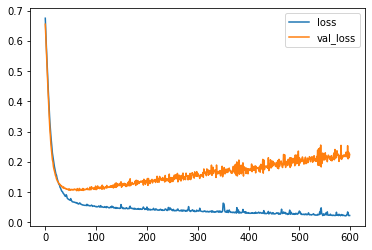

In [ ]:
model_loss.plot();

### Exemple 2 : Early Stop

Nous nous sommes évidemment trop entraînés ! Utilisons l'arrêt anticipé (Early Stopping)  pour suivre la perte de val_loss et arrêtons l'entraînement dès qu'elle commence à trop augmenter !

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

Arrêtons l'entraînement lorsqu'une quantité ou mesure contrôlée cesse de s'améliorer.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7195 - val_loss: 0.6830
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6741 - val_loss: 0.6542
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6408 - val_loss: 0.6210
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6076 - val_loss: 0.5876
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5709 - val_loss: 0.5468
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5299 - val_loss: 0.5011
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4822 - val_loss: 0.4480
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4335 - val_loss: 0.3974
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3859 - val_loss: 0.3543
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3404 - val_loss: 0.3139
Epoch 11/

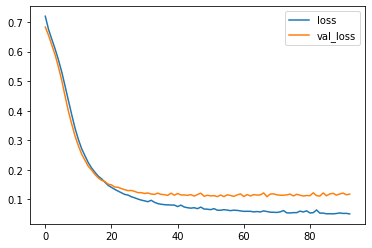

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

### Exemple 3 : Ajout de couches DropOut

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7047 - val_loss: 0.6888
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6805 - val_loss: 0.6689
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6665 - val_loss: 0.6485
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6459 - val_loss: 0.6221
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6265 - val_loss: 0.5994
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6221 - val_loss: 0.5777
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5868 - val_loss: 0.5544
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5677 - val_loss: 0.5355
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5385 - val_loss: 0.5077
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5253 - val_loss: 0.4671
Epoch 11/

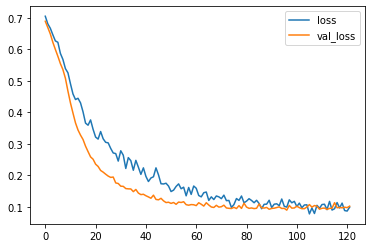

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

## Évaluation du modèle

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
